# 2. Exploratory Data Analysis

In order to fully understand the dataset we have to check through each and every aspects of the data. We need to get the grasp of how the data is stored is there any relationship between data which could enhance our analysis.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# import data
df_mean = pd.read_csv("data/data_mean.csv")
df_se = pd.read_csv("data/data_se.csv")
df_worst = pd.read_csv("data/data_worst.csv")

## 2.1 Descriptive Statistics

In [3]:
# check diagnosis distribution
pd.DataFrame(df_mean.groupby('diagnosis', axis=0).size(), columns=['# of occurence'])

,# of occurence
diagnosis,
B,357
M,212


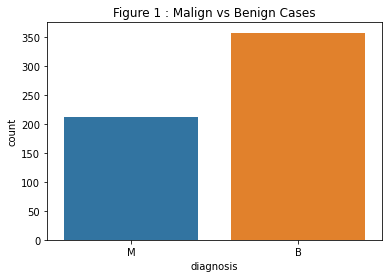

In [4]:
# histogram for count of different diagonis
sns.countplot(x="diagnosis", data=df_mean).set(title='Figure 1 : Malign vs Benign Cases');

In [5]:
# check data disctribution
df_mean.describe()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


## Obsrvations
> We denote that there are 357 people who were diagonosed as Benign[B] (no cancer cell) and 212 people who were Malignant[M] (presence of cancer cells).

## 2.2 Visualisations

A mojor part of analysis is visualization as understanding a data by representing using a graph or chart is much easier than getting it from numbers. Therefor in this section we will plot these data to get much more insight from it.

## Through Density Plots

Each column of the dataframe is being observed, the value count / density of each data is being monitored for any patterns.

### Data Set : Mean

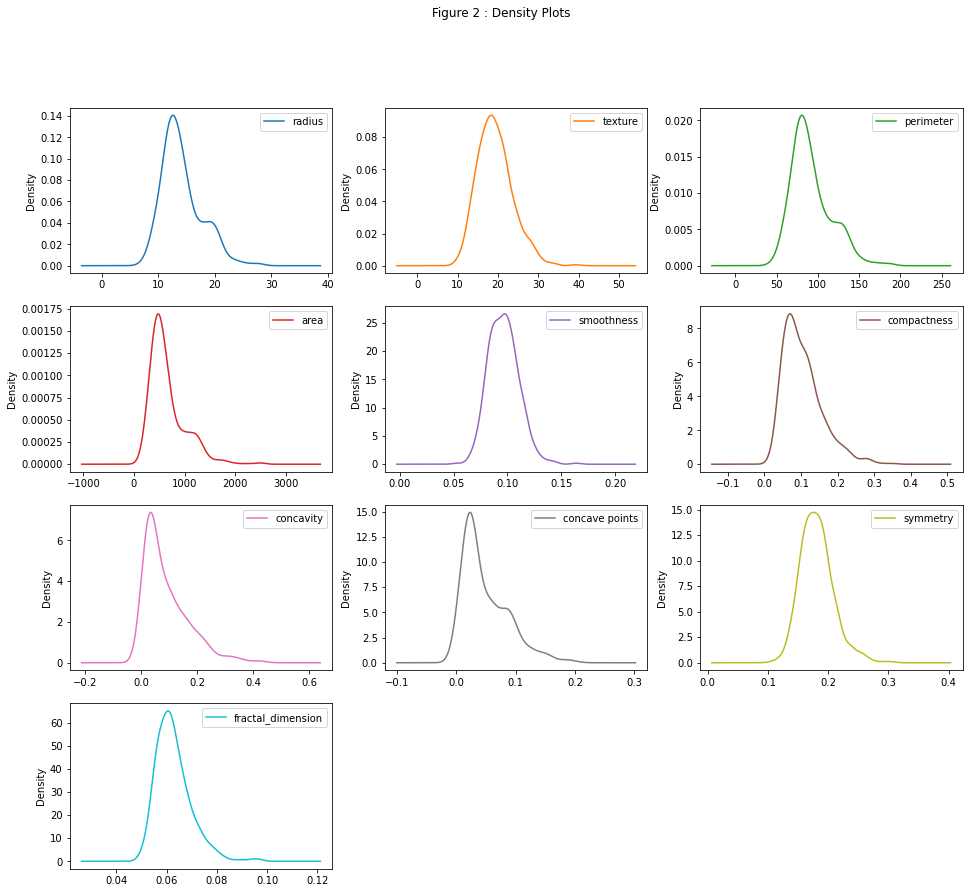

In [6]:
# plot density plot
density_mean=df_mean.plot(kind="density",title="Figure 2 : Density Plots", subplots=True, layout=(4,3), 
                          sharex=False, sharey=False, figsize=(16, 14));

### Data Set : Standard Error

In [7]:
# plot density plot
#density_se=df_se.plot(kind="density", subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(16, 14))

### Data Set : Worst / Largest (mean of three largest values)

In [8]:
# plot density plot
#density_worst=df_worst.plot(kind="density", subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(16, 14))

## Through Box Plots

Plotting box plots for each column to view the distribution of data overall.

### Data Set : Mean

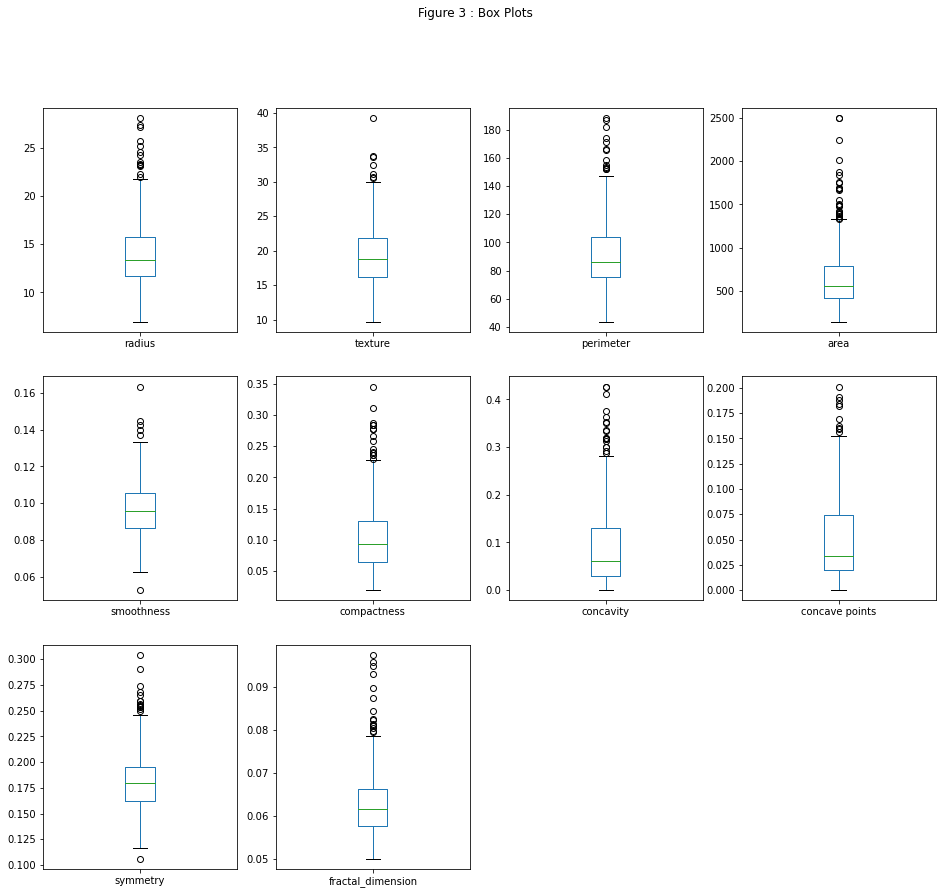

In [9]:
#box plot
box_mean=df_mean.plot(kind= 'box' , subplots=True, layout=(3,4), sharex=False, sharey=False, 
                      figsize=(16,14), title="Figure 3 : Box Plots")

### Data Set : Standard Error

In [10]:
#box plot
#box_se=df_se.plot(kind= 'box' , subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(16,14))

### Data Set : Worst / Largest (mean of three largest values)

In [11]:
#box plot
#box_worst=df_worst.plot(kind= 'box' , subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(16,14))

### Observations

> We can observe a number of patterns from the above figures. The columns smoothness, symmetry and texture potray a similar to Gaussian distribution as it might come in handy as many of the ml techniques out there use a Gaussian distribution on input variables. We can also observe that columns concave points ans concavity resembles to a exponential distribution.

## Through PairPlot

To check whether there is a coorelation between malignant and benign values we'll be plotting PairPlots.

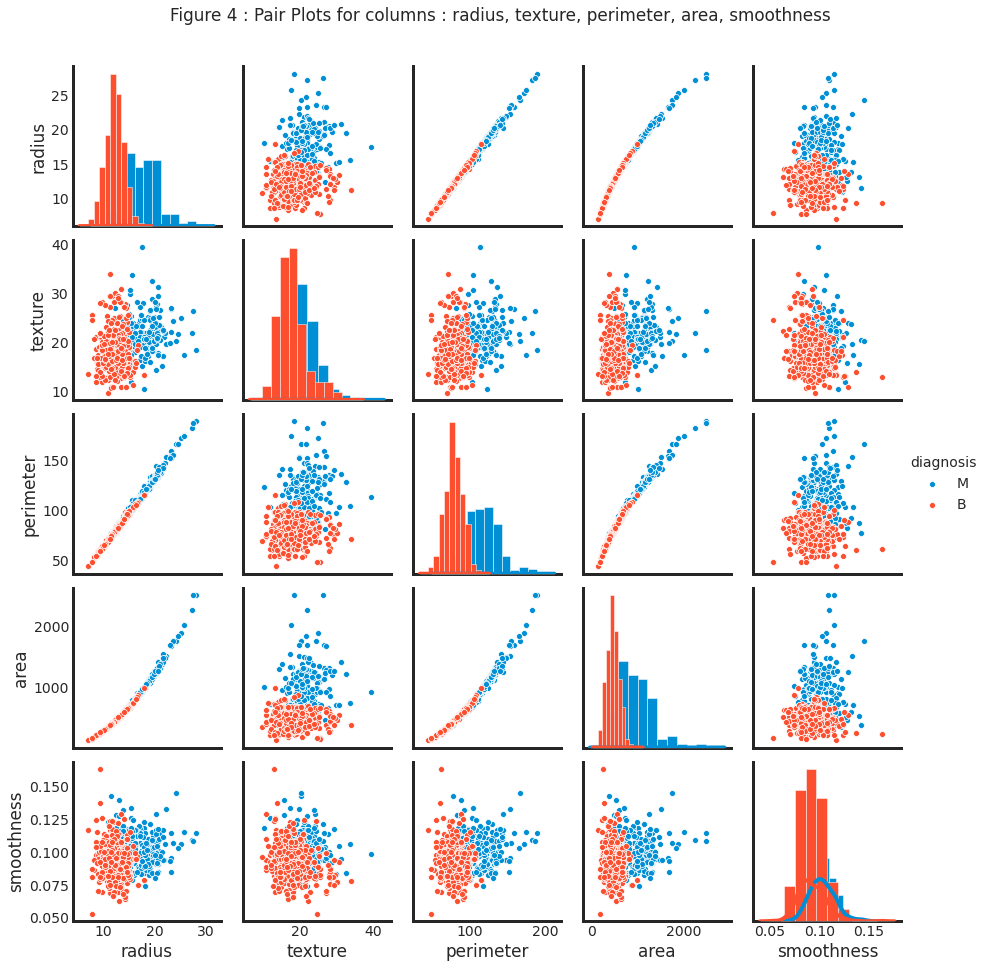

In [12]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

g = sns.pairplot(df_mean[[df_mean.columns[0],df_mean.columns[1],df_mean.columns[2],df_mean.columns[3],
                      df_mean.columns[4],df_mean.columns[5]]],hue="diagnosis")
g = g.map_diag(plt.hist)
g = g.fig.suptitle("Figure 4 : Pair Plots for columns : radius, texture, perimeter, area, smoothness", y=1.06)

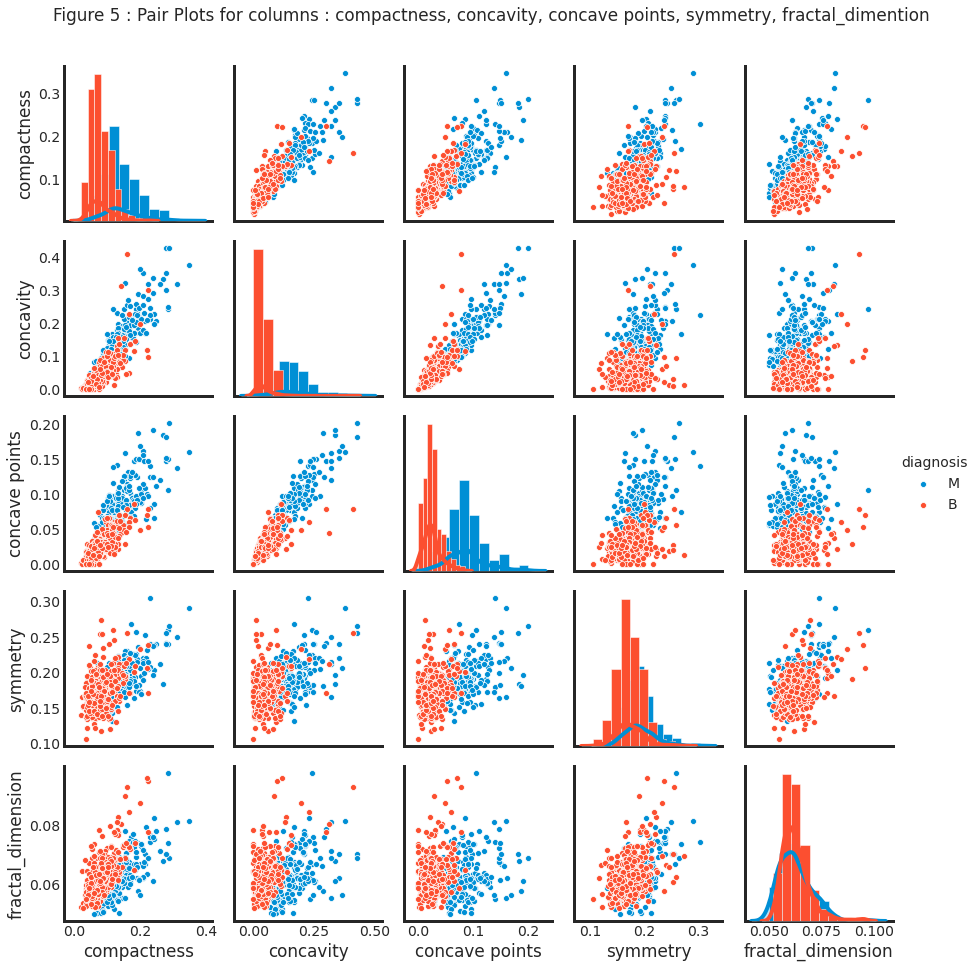

In [13]:
# remaining columns
plt.style.use('fivethirtyeight')
sns.set_style("white")

g = sns.pairplot(df_mean[[df_mean.columns[0],df_mean.columns[6],df_mean.columns[7],df_mean.columns[8],
                      df_mean.columns[9],df_mean.columns[10]]],hue="diagnosis");
g = g.map_diag(plt.hist)
g = g.fig.suptitle("Figure 5 : Pair Plots for columns : compactness, concavity, concave points, symmetry, fractal_dimention", y=1.06)

## Through Matrix Plot

In order to check the actual correlation between different columns, we'll be plotting a Heat Map.

In [14]:
tc = df_mean.corr()

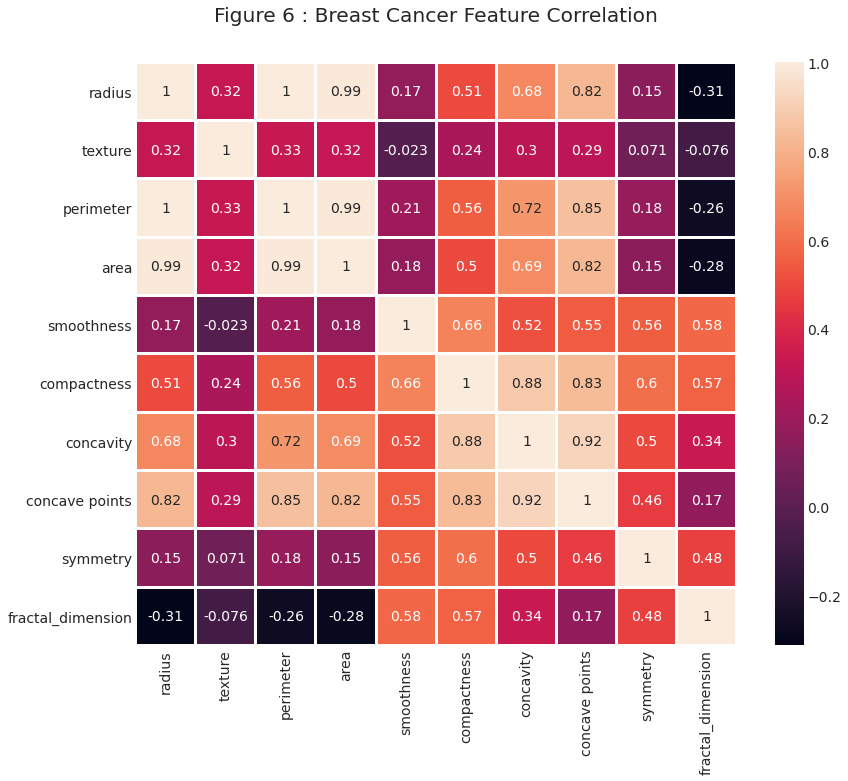

In [15]:
data, ax = plt.subplots(figsize=(12, 10))
plt.title('Figure 6 : Breast Cancer Feature Correlation', y=1.06)
heatmap_mean = sns.heatmap(tc, ax=ax, annot=True, fmt='.2g',linewidths=2)

### Observation

> After going through the plots we can see that there are no noticebly larger outliers, therefor no more cleaning needs to be performed. Also the values of radius, perimeter, area, compactness, concavity and concavity points are highly related to the malignancy of tumours, with rise of values the chances of tumours to get converted to cancer cell increases and the remaining columns doesn't show any such high interrelationship. Therefor the above values must be considered for the analysis. As goes for the correlation between variables, a strong correlation ( correaltion 0.75 and above ) is seen between radius, perimeter and area. Positive correlation is seen between cancavity and area, cancavity and perimeter, generally correlation of 0.5 to 0.75 and negative correlation is also present, (radius, perimeter and area ) and fractal dimention, as expected as area, radius and perimeter have a very high correlation. 
